# Banking Data Analysis

### 1. Initial Exploration

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


# Style for better visualisations
plt.style.use('default')
sns.set_palette("deep")


# Load and perform initial exploration of the dataset

print("Loading dataset...")
df = pd.read_csv('C:/Users/Banking_EDA/Comprehensive_Banking_Database.csv')

def explore_data(df):

    print(f"Dataset Shape: {df.shape}")
    print("\n" + "="*50)
    print("FIRST LOOK AT THE DATA")
    print("="*50)

    # Basic info
    print(f"Number of records: {len(df)}")
    print(f"Number of features: {len(df.columns)}")

    # Display first few rows
    print("\nFirst 5 rows:")
    display(df.head())

    # Data types and missing values
    print("\nData Types and Mising Values:")
    print(df.info())

    return df

df = explore_data(df)

Loading dataset...
Dataset Shape: (5000, 40)

FIRST LOOK AT THE DATA
Number of records: 5000
Number of features: 40

First 5 rows:


,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1



Data Types and Mising Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5000 non-null   int64  
 1   First Name                         5000 non-null   object 
 2   Last Name                          5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Gender                             5000 non-null   object 
 5   Address                            5000 non-null   object 
 6   City                               5000 non-null   object 
 7   Contact Number                     5000 non-null   int64  
 8   Email                              5000 non-null   object 
 9   Account Type                       5000 non-null   object 
 10  Account Balance                    5000 non-null   float64
 11  Date Of Account Opening  

### 2. Statistical Summary

In [45]:
# Generate basic statistical summary

def basic_statistics(df):

    print("\n" + "="*50)
    print("BASIC STATISTICS")
    print("="*50)

    # Numerical columns statitics
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    print("Numerical Columns Statistics:")
    display(df[numerical_cols].describe())

    # Categorical columns statistics
    categorical_cols = df.select_dtypes(include=['object']).columns
    print("\nCategorical Columns Summary:")
    for col in categorical_cols:
        print(f"\n{col}:")
        print(f"Unique values: {df[col].nunique()}")

        if df[col].nunique() > 0:
            print(f"Top 5 values:\n{df[col].value_counts().head()}")

    return df

df = basic_statistics(df)


BASIC STATISTICS
Numerical Columns Statistics:


,Customer ID,Age,Contact Number,Account Balance,TransactionID,Transaction Amount,Account Balance After Transaction,Branch ID,Loan ID,Loan Amount,Interest Rate,Loan Term,CardID,Credit Limit,Credit Card Balance,Minimum Payment Due,Rewards Points,Feedback ID,Anomaly
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.469800,1.945880e+10,5060.570918,2500.500000,2508.501144,5037.418898,50.586800,2500.500000,25501.042806,5.505038,36.520800,2500.500000,5549.035830,2487.40084,124.370134,4966.161800,2500.500000,0.880000
std,1443.520003,15.145672,1.443520e+03,2849.356481,1443.520003,1450.194986,4053.220017,28.499539,1443.520003,14039.732628,2.629752,16.924315,1443.520003,2581.718105,1446.80295,72.340102,2901.410915,1443.520003,0.475021
min,1.000000,18.000000,1.945879e+10,107.200000,1.000000,10.570000,-4878.760000,1.000000,1.000000,1006.370000,1.000000,12.000000,1.000000,1007.000000,1.45000,0.070000,1.000000,1.000000,-1.000000
25%,1250.750000,30.000000,1.945880e+10,2582.777500,1250.750000,1241.150000,2047.205000,26.000000,1250.750000,13315.305000,3.200000,24.000000,1250.750000,3314.065000,1243.51750,62.180000,2475.250000,1250.750000,1.000000
50%,2500.500000,43.000000,1.945880e+10,5075.500000,2500.500000,2494.025000,5089.785000,50.000000,2500.500000,25909.705000,5.520000,36.000000,2500.500000,5567.485000,2461.62000,123.080000,4950.500000,2500.500000,1.000000
75%,3750.250000,57.000000,1.945880e+10,7509.760000,3750.250000,3796.222500,8036.367500,75.000000,3750.250000,37441.570000,7.832500,48.000000,3750.250000,7786.040000,3722.58000,186.125000,7483.250000,3750.250000,1.000000
max,5000.000000,69.000000,1.945880e+10,9998.110000,5000.000000,4998.390000,14911.380000,99.000000,5000.000000,49993.490000,10.000000,60.000000,5000.000000,9997.780000,4997.11000,249.860000,9999.000000,5000.000000,1.000000



Categorical Columns Summary:

First Name:
Unique values: 50
Top 5 values:
First Name
Timothy    124
Ronald     123
Andrew     117
Charles    115
Betty      114
Name: count, dtype: int64

Last Name:
Unique values: 50
Top 5 values:
Last Name
Adams       121
Moore       119
Sanchez     119
Thompson    117
Gonzalez    113
Name: count, dtype: int64

Gender:
Unique values: 3
Top 5 values:
Gender
Female    1727
Other     1639
Male      1634
Name: count, dtype: int64

Address:
Unique values: 5000
Top 5 values:
Address
Address_1    1
Address_2    1
Address_3    1
Address_4    1
Address_5    1
Name: count, dtype: int64

City:
Unique values: 40
Top 5 values:
City
San Jose         163
Indianapolis     152
San Francisco    148
Detroit          143
Tucson           138
Name: count, dtype: int64

Email:
Unique values: 2139
Top 5 values:
Email
emily.adams@kag.com       8
paul.wilson@kag.com       8
daniel.sanchez@kag.com    7
linda.flores@kag.com      7
timothy.torres@kag.com    7
Name: count, dtype:

### 3. Data Quality

In [46]:
# Check data quality issues

def check_data_quality(df):

    print("\n" + "="*50)
    print("DATA QUALITY CHECK")
    print("="*50)

    # Missing values
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    print("Missing Values Analysis:")
    missing_info = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_percent
    })
    missing_info = missing_info[missing_info['Missing Count'] > 0]
    if len(missing_info) > 0:
        display(mising_info)
    else:
        print("No missing values found!")

    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicates}")

    return df

df = check_data_quality(df)


DATA QUALITY CHECK
Missing Values Analysis:
No missing values found!

Number of duplicate rows: 0


### 4. Customer Demographics


DEMOGRAPHIC ANALYSIS


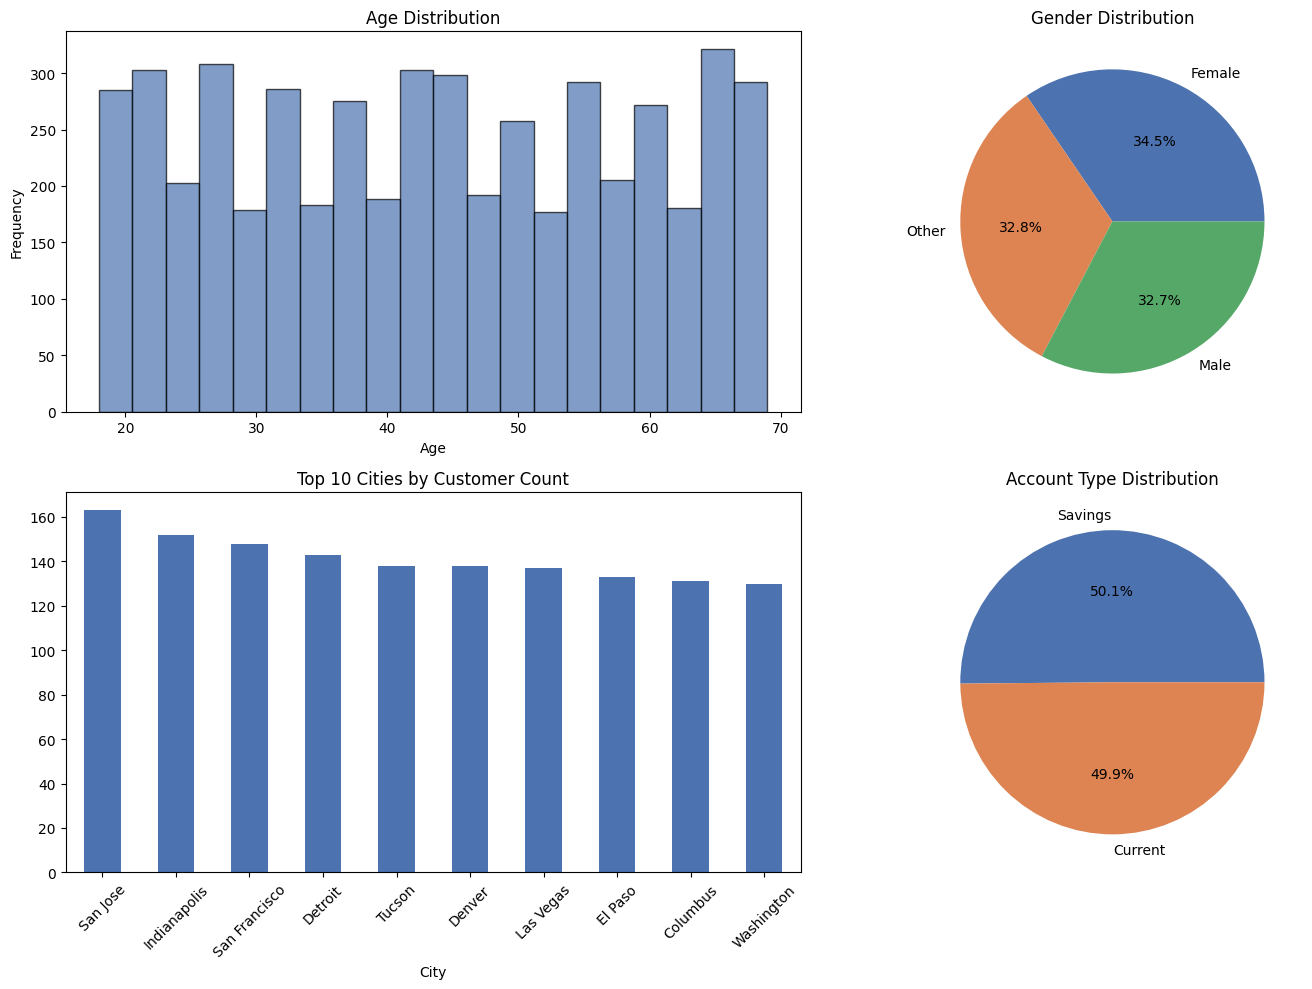

Average Age: 43.47
Age Range: 18 - 69
Most Common City: San Jose
Most Common Account Type: Savings


In [47]:
# Analyze customer demographics

def demographic_analysis(df):

    print("\n" + "="*50)
    print("DEMOGRAPHIC ANALYSIS")
    print("="*50)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Age distribution
    if 'Age' in df.columns:
        axes[0, 0].hist(df['Age'].dropna(), bins=20, edgecolor='black', alpha=0.7)
        axes[0, 0].set_title('Age Distribution')
        axes[0, 0].set_xlabel('Age')
        axes[0, 0].set_ylabel('Frequency')

    # Gender distribution
    if 'Gender' in df.columns:
        gender_counts = df['Gender'].value_counts()
        if len(gender_counts) > 0:
            axes[0, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
            axes[0, 1].set_title('Gender Distribution')

    # City distribution (top 10)
    if 'City' in df.columns:
        top_cities = df['City'].value_counts().head(10)
        if len(top_cities) > 0:
            top_cities.plot(kind='bar', ax=axes[1, 0])
            axes[1, 0].set_title('Top 10 Cities by Customer Count')
            axes[1, 0].tick_params(axis='x', rotation=45)

    # Account type distribution
    if 'Account Type' in df.columns:
        account_type_counts = df['Account Type'].value_counts()
        if len(account_type_counts) > 0:
            axes[1, 1].pie(account_type_counts.values, labels=account_type_counts.index, autopct='%1.1f%%')
            axes[1, 1].set_title('Account Type Distribution')
    
    plt.tight_layout()
    plt.show()

    # Demographic statistics
    if 'Age' in df.columns:
        print(f"Average Age: {df['Age'].mean():.2f}")
        print(f"Age Range: {df['Age'].min()} - {df['Age'].max()}")
        
    if 'City' in df.columns:
        print(f"Most Common City: {df['City'].mode()[0] if len(df['City'].mode()) > 0 else 'N/A'}")
        print(f"Most Common Account Type: {df['Account Type'].mode()[0] if len(df['Account Type'].mode()) > 0 else 'N/A'}")

    return df

df = demographic_analysis(df)

### 5. Financial Aspects


FINANCIAL ANALYSIS


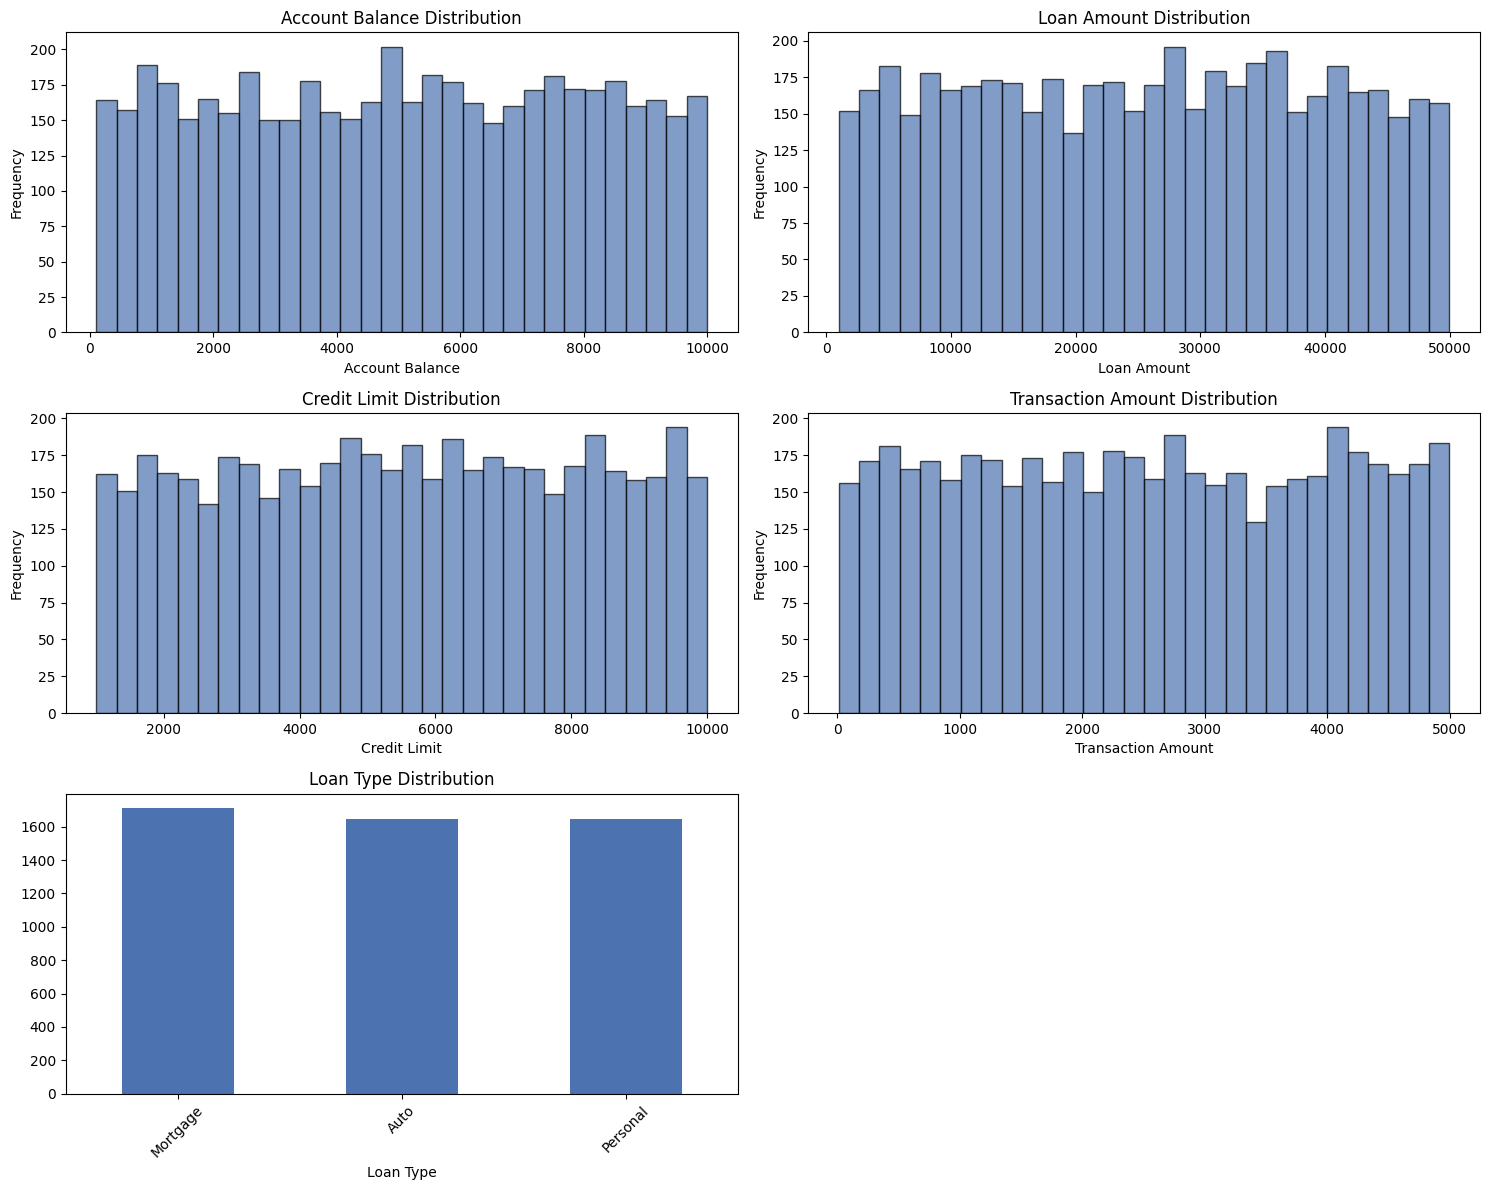

Financial Statistics:
Average Account Balance: $5060.57
Average Loan Amount: $25501.04
Average Credit Limit: $5549.04
Most Common Loan Type: Mortgage
Most Common Card Type: MasterCard


In [48]:
# Analyze financial aspects

def financial_analysis(df):

    print("\n" + "="*50)
    print("FINANCIAL ANALYSIS")
    print("="*50)

    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    axes = axes.flatten()

    plot_index = 0

    # Account balance distribution
    if 'Account Balance' in df.columns:
        axes[plot_index].hist(df['Account Balance'].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[plot_index].set_title('Account Balance Distribution')
        axes[plot_index].set_xlabel('Account Balance')
        axes[plot_index].set_ylabel('Frequency')
        plot_index += 1

    # Loan amount distribution
    if 'Loan Amount' in df.columns:
        axes[plot_index].hist(df['Loan Amount'].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[plot_index].set_title('Loan Amount Distribution')
        axes[plot_index].set_xlabel('Loan Amount')
        axes[plot_index].set_ylabel('Frequency')
        plot_index += 1

    # Credit limit distribution
    if 'Credit Limit' in df.columns:
        axes[plot_index].hist(df['Credit Limit'].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[plot_index].set_title('Credit Limit Distribution')
        axes[plot_index].set_xlabel('Credit Limit')
        axes[plot_index].set_ylabel('Frequency')
        plot_index += 1

    # Transaction amount distribution
    if 'Transaction Amount' in df.columns:
        axes[plot_index].hist(df['Transaction Amount'].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[plot_index].set_title('Transaction Amount Distribution')
        axes[plot_index].set_xlabel('Transaction Amount')
        axes[plot_index].set_ylabel('Frequency')
        plot_index += 1

    # Loan type distribution
    if 'Loan Type' in df.columns:
        loan_type_counts = df['Loan Type'].value_counts()
        if len(loan_type_counts) > 0:
            loan_type_counts.head(10).plot(kind='bar', ax=axes[plot_index])
            axes[plot_index].set_title('Loan Type Distribution')
            axes[plot_index].tick_params(axis='x', rotation=45)
            plot_index += 1

    # Card type distribution
    if 'Card Type' in df.columns:
        card_type_counts = df['Card Type'].value_counts()
        if len(card_type_counts) > 0:
            card_type_counts.plot(kind='bar', ax=axes[plot_index])
            axes[plot_index].set_title('Card Type Distribution')
            axes[plot_index].tick_params(axis='x', rotation=45)

    # Hide empty subplots
    for i in range(plot_index, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Financial statistics
    print("Financial Statistics:")
    if 'Account Balance' in df.columns:
        print(f"Average Account Balance: ${df['Account Balance'].mean():.2f}")
    if 'Loan Amount' in df.columns:
        print(f"Average Loan Amount: ${df['Loan Amount'].mean():.2f}")
    if 'Credit Limit' in df.columns:
        print(f"Average Credit Limit: ${df['Credit Limit'].mean():.2f}")
    if 'Loan Type' in df.columns:
        print(f"Most Common Loan Type: {df['Loan Type'].mode()[0] if len(df['Loan Type'].mode()) > 0 else 'N/A'}")
    if 'Card Type' in df.columns:
        print(f"Most Common Card Type: {df['Card Type'].mode()[0] if len(df['Card Type'].mode()) > 0 else 'N/A'}")

    return df

df = financial_analysis(df)

### 6. Transaction Patterns


TRANSACTION ANALYSIS
Number of transaction resulting in negative balance: 604


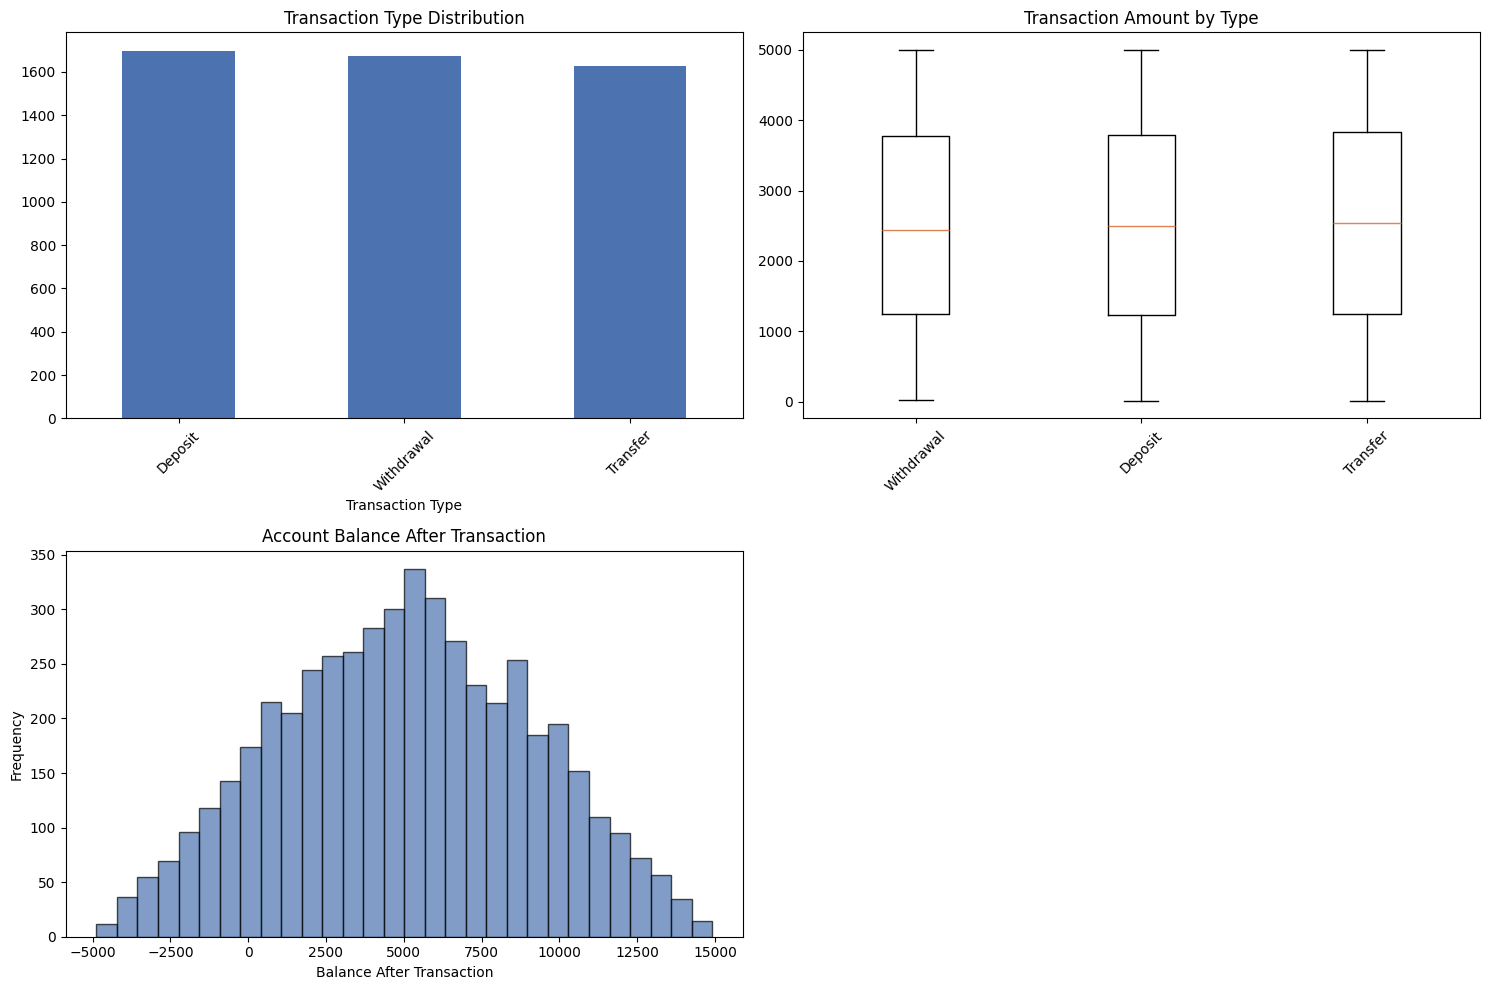

In [49]:
# Analyze transaction patterns

def transaction_analysis(df):

    print("\n" + "="*50)
    print("TRANSACTION ANALYSIS")
    print("="*50)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    plot_index = 0

    # Transaction type distribution
    if 'Transaction Type' in df.columns:
        transaction_type_counts = df['Transaction Type'].value_counts()
        if len(transaction_type_counts) > 0:
            transaction_type_counts.plot(kind='bar', ax=axes[plot_index])
            axes[plot_index].set_title('Transaction Type Distribution')
            axes[plot_index].tick_params(axis='x', rotation=45)
            plot_index += 1

    # Transaction amount by type
    if 'Transaction Type' in df.columns and 'Transaction Amount' in df.columns:
        df_boxplot = df[['Transaction Type', 'Transaction Amount']].dropna()
        if len (df_boxplot) > 0:
            transaction_types = df_boxplot['Transaction Type'].unique()
            data_to_plot = [df_boxplot[df_boxplot['Transaction Type'] == t] ['Transaction Amount'] for t in transaction_types]

            box = axes[plot_index].boxplot(data_to_plot, labels=transaction_types)
            axes[plot_index].set_title('Transaction Amount by Type')
            axes[plot_index].tick_params(axis='x', rotation=45)
            plot_index += 1

    # Account balance after transaction
    if 'Account Balance After Transaction' in df.columns:
        axes[plot_index].hist(df['Account Balance After Transaction'].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[plot_index].set_title('Account Balance After Transaction')
        axes[plot_index].set_xlabel('Balance After Transaction')
        axes[plot_index].set_ylabel('Frequency')
        plot_index += 1

    # Negative balances analysis
    if 'Account Balance After Transaction' in df.columns:
        negative_balances = df[df['Account Balance After Transaction'] < 0]
        print(f"Number of transaction resulting in negative balance: {len(negative_balances)}")

        if len(negative_balances) > 0:
            negative_balances['Transaction Type'].value_counts().plot(kind='bar', ax=axes[plot_index])
            axes[plot_index].set_title('Transaction Types for Negative Balances')
            axes[plot_index].tick_params(axis='x', rotation=45)

    # Hide empty subplots
    for i in range(plot_index, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

    return df

df = transaction_analysis(df)

### 7. Loan Portfolio


LOAN ANALYSIS


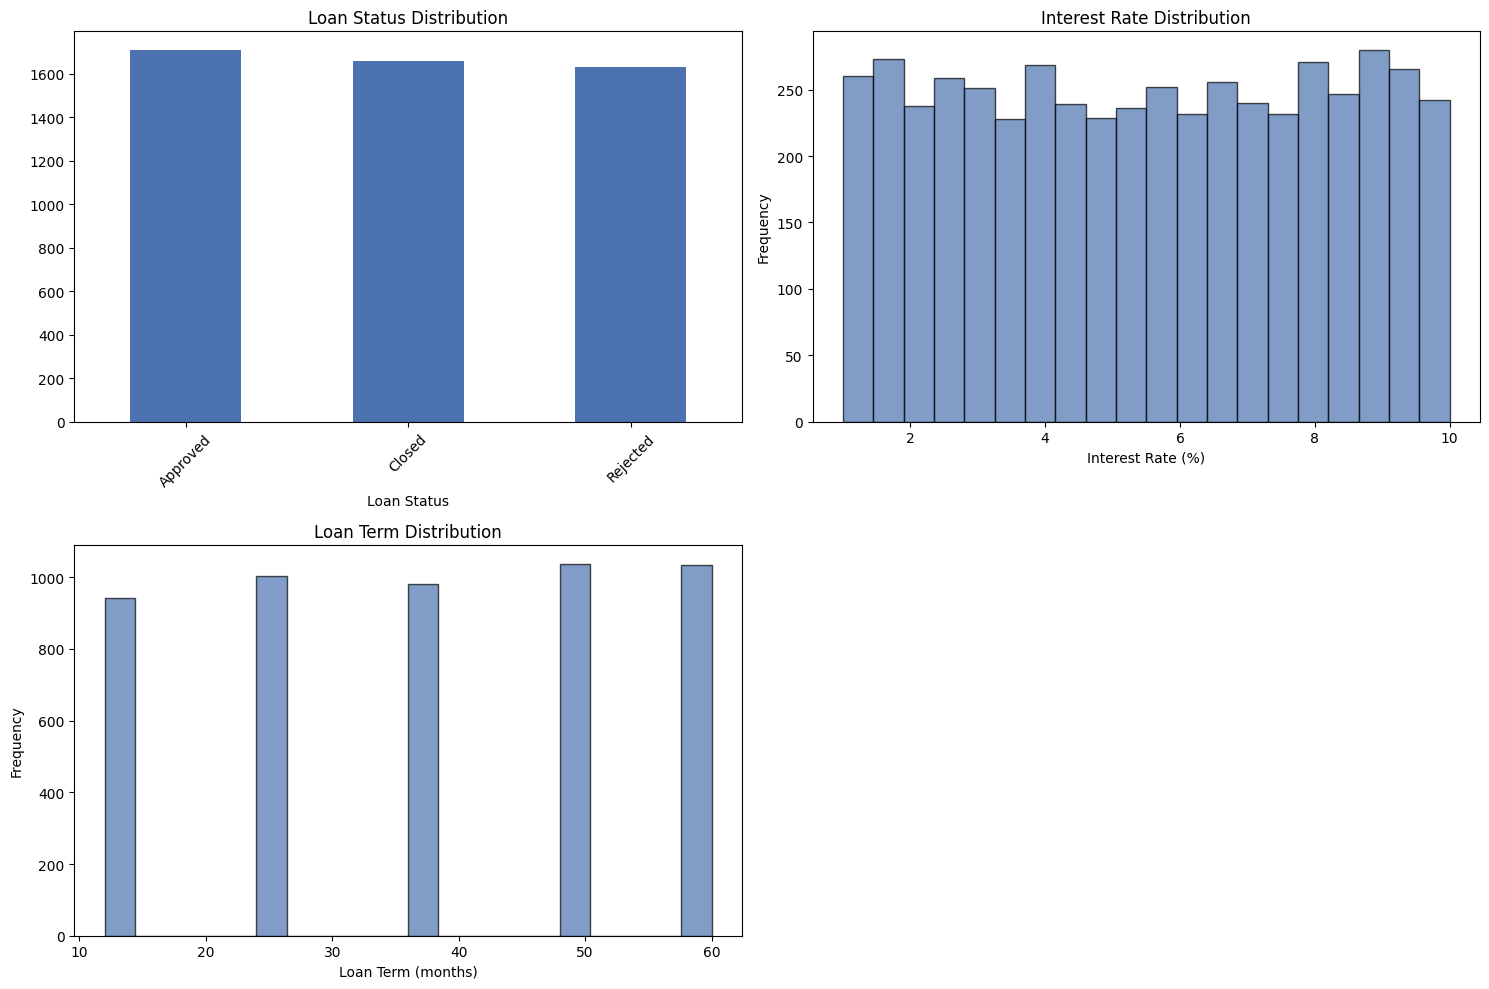

Loan Portfolio Statistics:
Average Interest Rate: 5.51%
Average Loan Term: 36.5 months
Loan Approval Rate:34.2%


In [50]:
# Analyze loan portfolio

def loan_analysis(df):

    print("\n" + "="*50)
    print("LOAN ANALYSIS")
    print("="*50)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    plot_index = 0

    # Loan status distribution
    if 'Loan Status' in df.columns:
        loan_status_counts = df['Loan Status'].value_counts()
        if len(loan_status_counts) > 0:
            loan_status_counts.plot(kind='bar', ax=axes[plot_index])
            axes[plot_index].set_title('Loan Status Distribution')
            axes[plot_index].tick_params(axis='x', rotation=45)
            plot_index += 1

    # Interest rate distribution
    if 'Interest Rate' in df.columns:
        axes[plot_index].hist(df['Interest Rate'].dropna(), bins=20, edgecolor='black', alpha=0.7)
        axes[plot_index].set_title('Interest Rate Distribution')
        axes[plot_index].set_xlabel('Interest Rate (%)')
        axes[plot_index].set_ylabel('Frequency')
        plot_index += 1

    # Loan term distribution
    if 'Loan Term' in df.columns:
        axes[plot_index].hist(df['Loan Term'].dropna(), bins=20, edgecolor='black', alpha=0.7)
        axes[plot_index].set_title('Loan Term Distribution')
        axes[plot_index].set_xlabel('Loan Term (months)')
        axes[plot_index].set_ylabel('Frequency')
        plot_index += 1

    # Loan amount by loan type
    if 'Loan Type' in df.columns and 'Loan Amount' in df.columns:
        df_boxplot = df[['Loan Type', 'Loan Amount']].dropna()
        if len(df_boxplot) > 0:
            loan_types = df_boxplot['Loan Type'].unique()
            data_to_plot = [df_boxplot[df_boxplot['Loan Type'] == t]['Loan Amount'] for t in loan_types]

            box = axes[plot_index].boxplot(data_to_plot, labels=loan_types)
            axes[plot_index].set_title('Loan Amount by Loan Type')
            axes[plot_index].tick_params(axis='x', rotation=45)

    # Hide empty subplots
    for i in range(plot_index, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

    # Loan statistics
    print("Loan Portfolio Statistics:")
    if 'Interest Rate' in df.columns:
        print(f"Average Interest Rate: {df['Interest Rate'].mean():.2f}%")
    if 'Loan Term' in df.columns:
        print(f"Average Loan Term: {df['Loan Term'].mean():.1f} months")
    if 'Loan Status' in df.columns:
        approval_rate = (df['Loan Status'] == 'Approved').mean() * 100
        print(f"Loan Approval Rate:{approval_rate:.1f}%")

    return df

df = loan_analysis(df)

### 8. Correlation Analysis


CORRELATION ANALYSIS


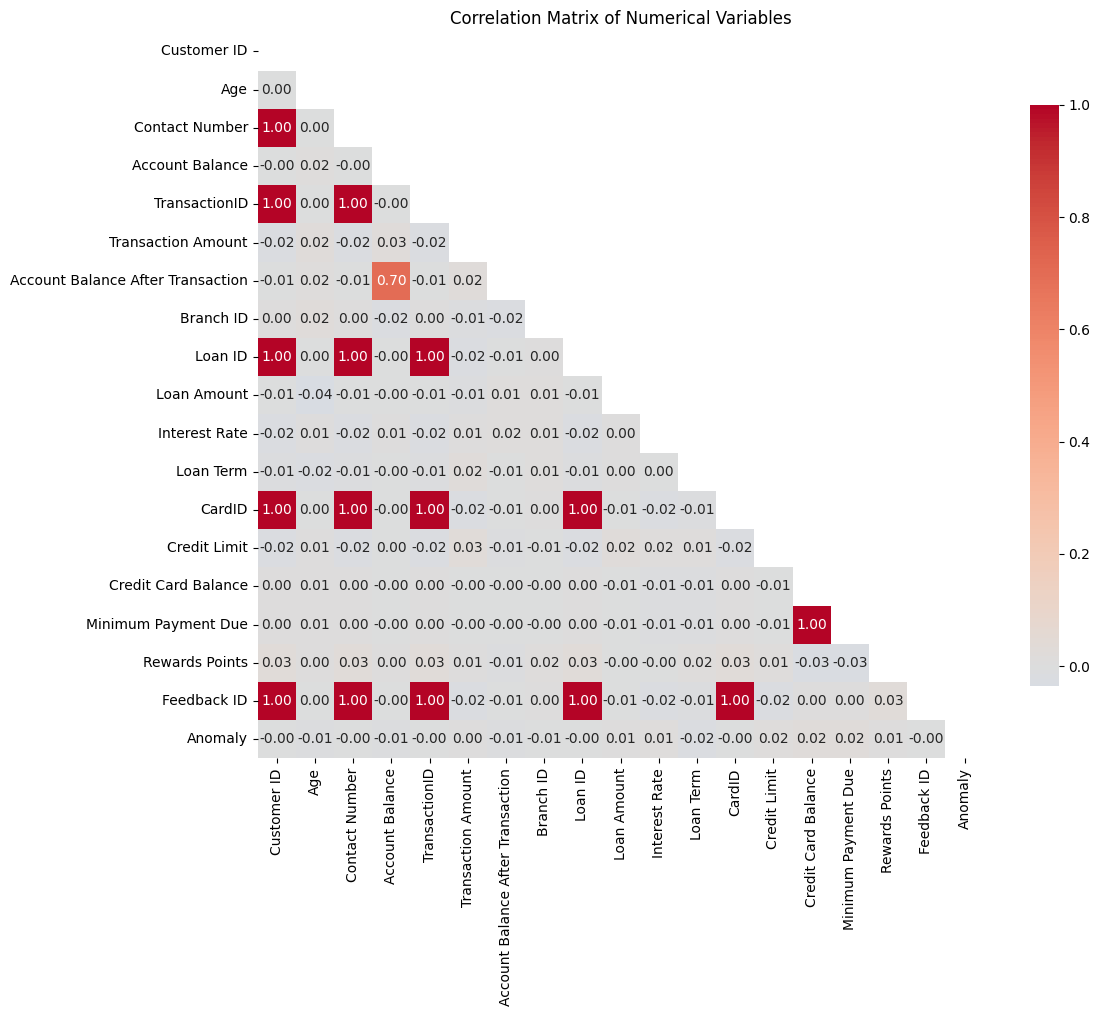

Top Correlations:
Customer ID     TransactionID     1.0
Contact Number  CardID            1.0
                Loan ID           1.0
CardID          Feedback ID       1.0
                Loan ID           1.0
                Customer ID       1.0
Contact Number  Feedback ID       1.0
Feedback ID     Customer ID       1.0
CardID          TransactionID     1.0
                Contact Number    1.0
dtype: float64


In [51]:
# Perform correlation analysis

def correlation_analysis(df):

    print("\n" + "="*50)
    print("CORRELATION ANALYSIS")
    print("="*50)

    # Select numerical columns for correlation
    numerical_cols = df.select_dtypes(include=[np.number]).columns

    if len(numerical_cols) > 1:
        correlation_matrix = df[numerical_cols].corr()

        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                    center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
        plt.title('Correlation Matrix of Numerical Variables')
        plt.tight_layout()
        plt.show()

        # Top correlations
        print("Top Correlations:")
        corr_pairs = correlation_matrix.unstack()

        # Removal of diagonal and duplicates
        corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
        top_correlations = corr_pairs.sort_values(key=abs, ascending=False).head(10)
        print(top_correlations)
    else:
        print("Not enough numerical columns for correlation analysis")

    return df

df = correlation_analysis(df)

### 9. Anomaly Analysis


ANOMALY ANALYSIS
Anomaly Distribution:
Anomaly
 1    4700
-1     300
Name: count, dtype: int64


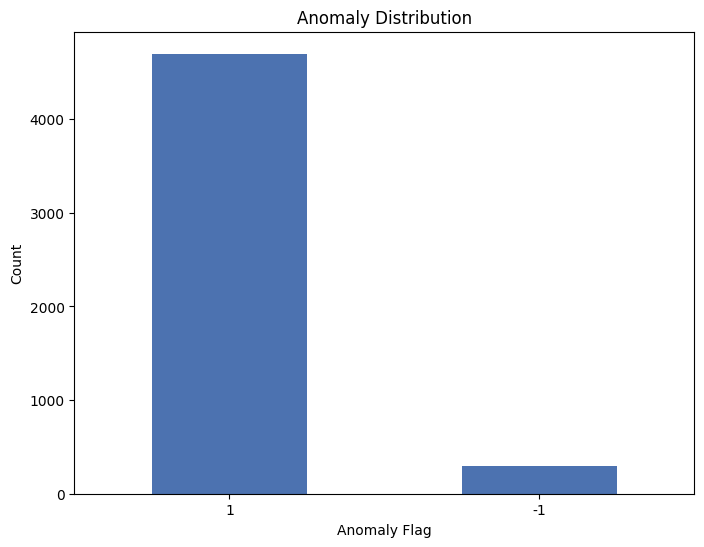


Normal records: 4700
Anomalous records: 300

Account Balance Comparison:
Normal - Mean: 5050.46, Std: 2850.12
Anomalous - Mean: 5218.96, Std: 2837.43

Transaction Amount Comparison:
Normal - Mean: 2509.79, Std: 1447.91
Anomalous - Mean: 2488.33, Std: 1487.88

Loan Amount Comparison:
Normal - Mean: 25526.42, Std: 14065.03
Anomalous - Mean: 25103.51, Std: 13654.05

Age Comparison:
Normal - Mean: 43.43, Std: 15.11
Anomalous - Mean: 44.11, Std: 15.70


In [52]:
# Analyze anomalies in the data

def anomaly_analysis(df):

    print("\n" + "="*50)
    print("ANOMALY ANALYSIS")
    print("="*50)

    if 'Anomaly' in df.columns:
        anomaly_counts = df['Anomaly'].value_counts()

        print("Anomaly Distribution:")
        print(anomaly_counts)

        plt.figure(figsize=(8, 6))
        anomaly_counts.plot(kind='bar')
        plt.title('Anomaly Distribution')
        plt.xlabel('Anomaly Flag')
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.show()

        # Compare normal vs anomalous records
        if len(anomaly_counts) > 1:
            normal_data = df[df['Anomaly'] == 1]
            anomalous_data =df[df['Anomaly'] == -1]

            print(f"\nNormal records: {len(normal_data)}")
            print(f"Anomalous records: {len(anomalous_data)}")

            # Compare key metrics
            comparison_metrics = ['Account Balance', 'Transaction Amount', 'Loan Amount', 'Age']
            for metric in comparison_metrics:
                if metric in df.columns:
                    print(f"\n{metric} Comparison:")
                    
                    if len(normal_data) > 0:
                        print(f"Normal - Mean: {normal_data[metric].mean():.2f}, Std: {normal_data[metric].std():.2f}")

                    if len(anomalous_data) > 0:
                        print(f"Anomalous - Mean: {anomalous_data[metric].mean():.2f}, Std: {anomalous_data[metric].std():.2f}")
                    
    else:
        print("No 'Anomaly' column found in the dataset")

    return df

df = anomaly_analysis(df)

### 10. Comprehensive EDA

COMPREHENSIVE BANKING DATA EXPLORATORY DATA ANALYSIS
Dataset Shape: (5000, 40)

FIRST LOOK AT THE DATA
Number of records: 5000
Number of features: 40

First 5 rows:


,Customer ID,First Name,Last Name,Age,Gender,Address,City,Contact Number,Email,Account Type,...,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback ID,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
0,1,Joshua,Hall,45,Male,Address_1,Fort Worth,19458794854,joshua.hall@kag.com,Current,...,226.22,11/26/2023,3/20/2023,8142,1,10/6/2023,Suggestion,Resolved,1/22/2023,1
1,2,Mark,Taylor,47,Female,Address_2,Louisville,19458794855,mark.taylor@kag.com,Current,...,42.84,11/5/2023,6/16/2023,4306,2,4/7/2023,Complaint,Resolved,8/27/2023,1
2,3,Joseph,Flores,25,Female,Address_3,Philadelphia,19458794856,joseph.flores@kag.com,Current,...,162.12,1/8/2023,3/20/2023,4842,3,9/7/2023,Praise,Pending,5/11/2023,1
3,4,Kevin,Lee,52,Other,Address_4,Oklahoma City,19458794857,kevin.lee@kag.com,Savings,...,216.46,9/8/2023,10/15/2023,9463,4,5/28/2023,Complaint,Resolved,7/5/2023,1
4,5,Linda,Johnson,68,Other,Address_5,Phoenix,19458794858,linda.johnson@kag.com,Savings,...,1.29,3/4/2023,7/27/2023,2209,5,2/12/2023,Complaint,Resolved,11/21/2023,1



Data Types and Mising Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        5000 non-null   int64  
 1   First Name                         5000 non-null   object 
 2   Last Name                          5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Gender                             5000 non-null   object 
 5   Address                            5000 non-null   object 
 6   City                               5000 non-null   object 
 7   Contact Number                     5000 non-null   int64  
 8   Email                              5000 non-null   object 
 9   Account Type                       5000 non-null   object 
 10  Account Balance                    5000 non-null   float64
 11  Date Of Account Opening  

,Customer ID,Age,Contact Number,Account Balance,TransactionID,Transaction Amount,Account Balance After Transaction,Branch ID,Loan ID,Loan Amount,Interest Rate,Loan Term,CardID,Credit Limit,Credit Card Balance,Minimum Payment Due,Rewards Points,Feedback ID,Anomaly
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,43.469800,1.945880e+10,5060.570918,2500.500000,2508.501144,5037.418898,50.586800,2500.500000,25501.042806,5.505038,36.520800,2500.500000,5549.035830,2487.40084,124.370134,4966.161800,2500.500000,0.880000
std,1443.520003,15.145672,1.443520e+03,2849.356481,1443.520003,1450.194986,4053.220017,28.499539,1443.520003,14039.732628,2.629752,16.924315,1443.520003,2581.718105,1446.80295,72.340102,2901.410915,1443.520003,0.475021
min,1.000000,18.000000,1.945879e+10,107.200000,1.000000,10.570000,-4878.760000,1.000000,1.000000,1006.370000,1.000000,12.000000,1.000000,1007.000000,1.45000,0.070000,1.000000,1.000000,-1.000000
25%,1250.750000,30.000000,1.945880e+10,2582.777500,1250.750000,1241.150000,2047.205000,26.000000,1250.750000,13315.305000,3.200000,24.000000,1250.750000,3314.065000,1243.51750,62.180000,2475.250000,1250.750000,1.000000
50%,2500.500000,43.000000,1.945880e+10,5075.500000,2500.500000,2494.025000,5089.785000,50.000000,2500.500000,25909.705000,5.520000,36.000000,2500.500000,5567.485000,2461.62000,123.080000,4950.500000,2500.500000,1.000000
75%,3750.250000,57.000000,1.945880e+10,7509.760000,3750.250000,3796.222500,8036.367500,75.000000,3750.250000,37441.570000,7.832500,48.000000,3750.250000,7786.040000,3722.58000,186.125000,7483.250000,3750.250000,1.000000
max,5000.000000,69.000000,1.945880e+10,9998.110000,5000.000000,4998.390000,14911.380000,99.000000,5000.000000,49993.490000,10.000000,60.000000,5000.000000,9997.780000,4997.11000,249.860000,9999.000000,5000.000000,1.000000



Categorical Columns Summary:

First Name:
Unique values: 50
Top 5 values:
First Name
Timothy    124
Ronald     123
Andrew     117
Charles    115
Betty      114
Name: count, dtype: int64

Last Name:
Unique values: 50
Top 5 values:
Last Name
Adams       121
Moore       119
Sanchez     119
Thompson    117
Gonzalez    113
Name: count, dtype: int64

Gender:
Unique values: 3
Top 5 values:
Gender
Female    1727
Other     1639
Male      1634
Name: count, dtype: int64

Address:
Unique values: 5000
Top 5 values:
Address
Address_1    1
Address_2    1
Address_3    1
Address_4    1
Address_5    1
Name: count, dtype: int64

City:
Unique values: 40
Top 5 values:
City
San Jose         163
Indianapolis     152
San Francisco    148
Detroit          143
Tucson           138
Name: count, dtype: int64

Email:
Unique values: 2139
Top 5 values:
Email
emily.adams@kag.com       8
paul.wilson@kag.com       8
daniel.sanchez@kag.com    7
linda.flores@kag.com      7
timothy.torres@kag.com    7
Name: count, dtype:

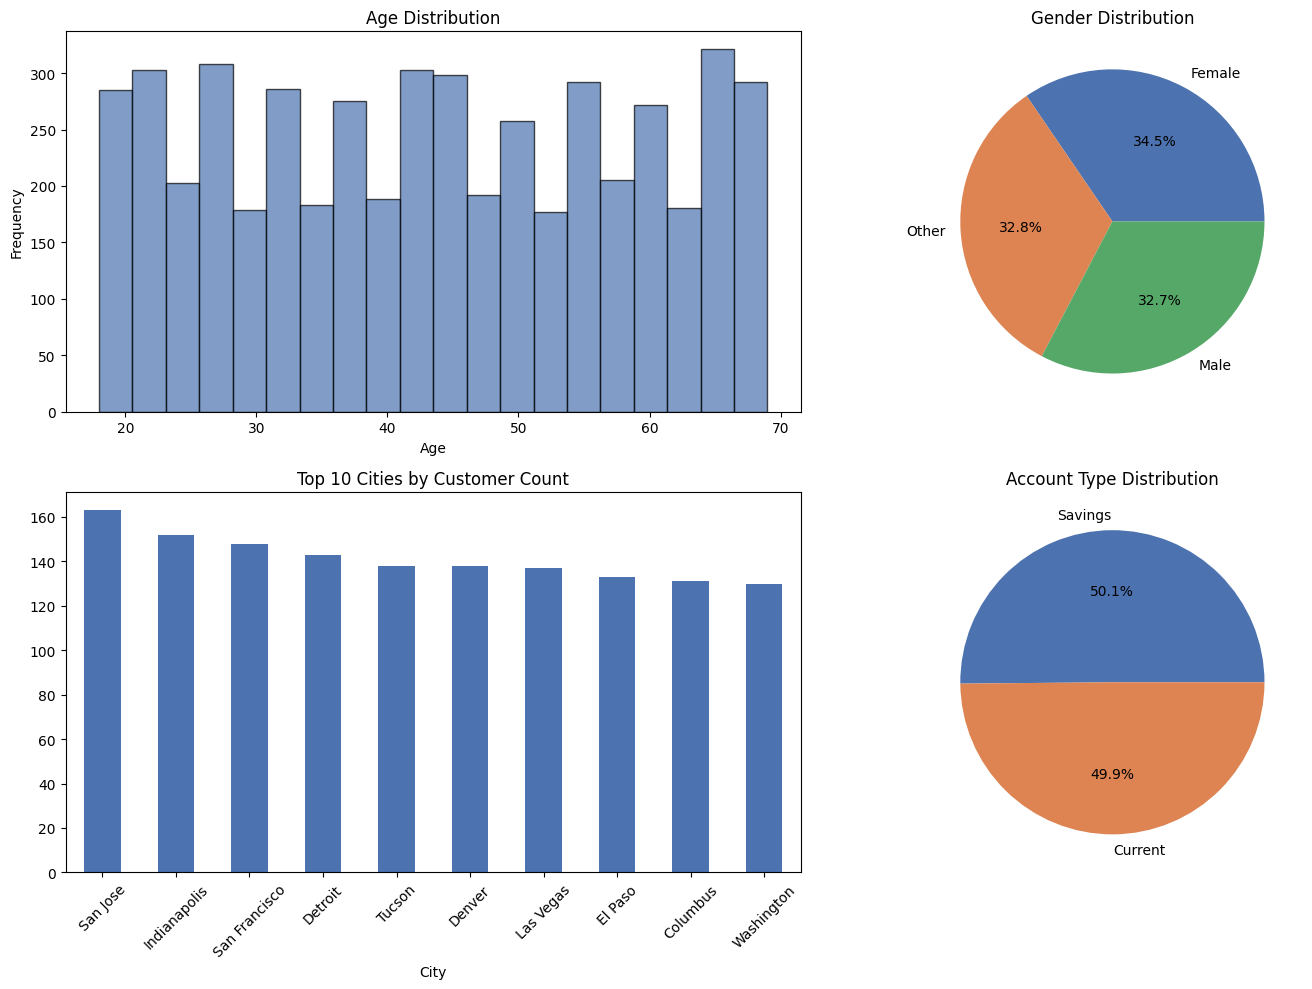

Average Age: 43.47
Age Range: 18 - 69
Most Common City: San Jose
Most Common Account Type: Savings

FINANCIAL ANALYSIS


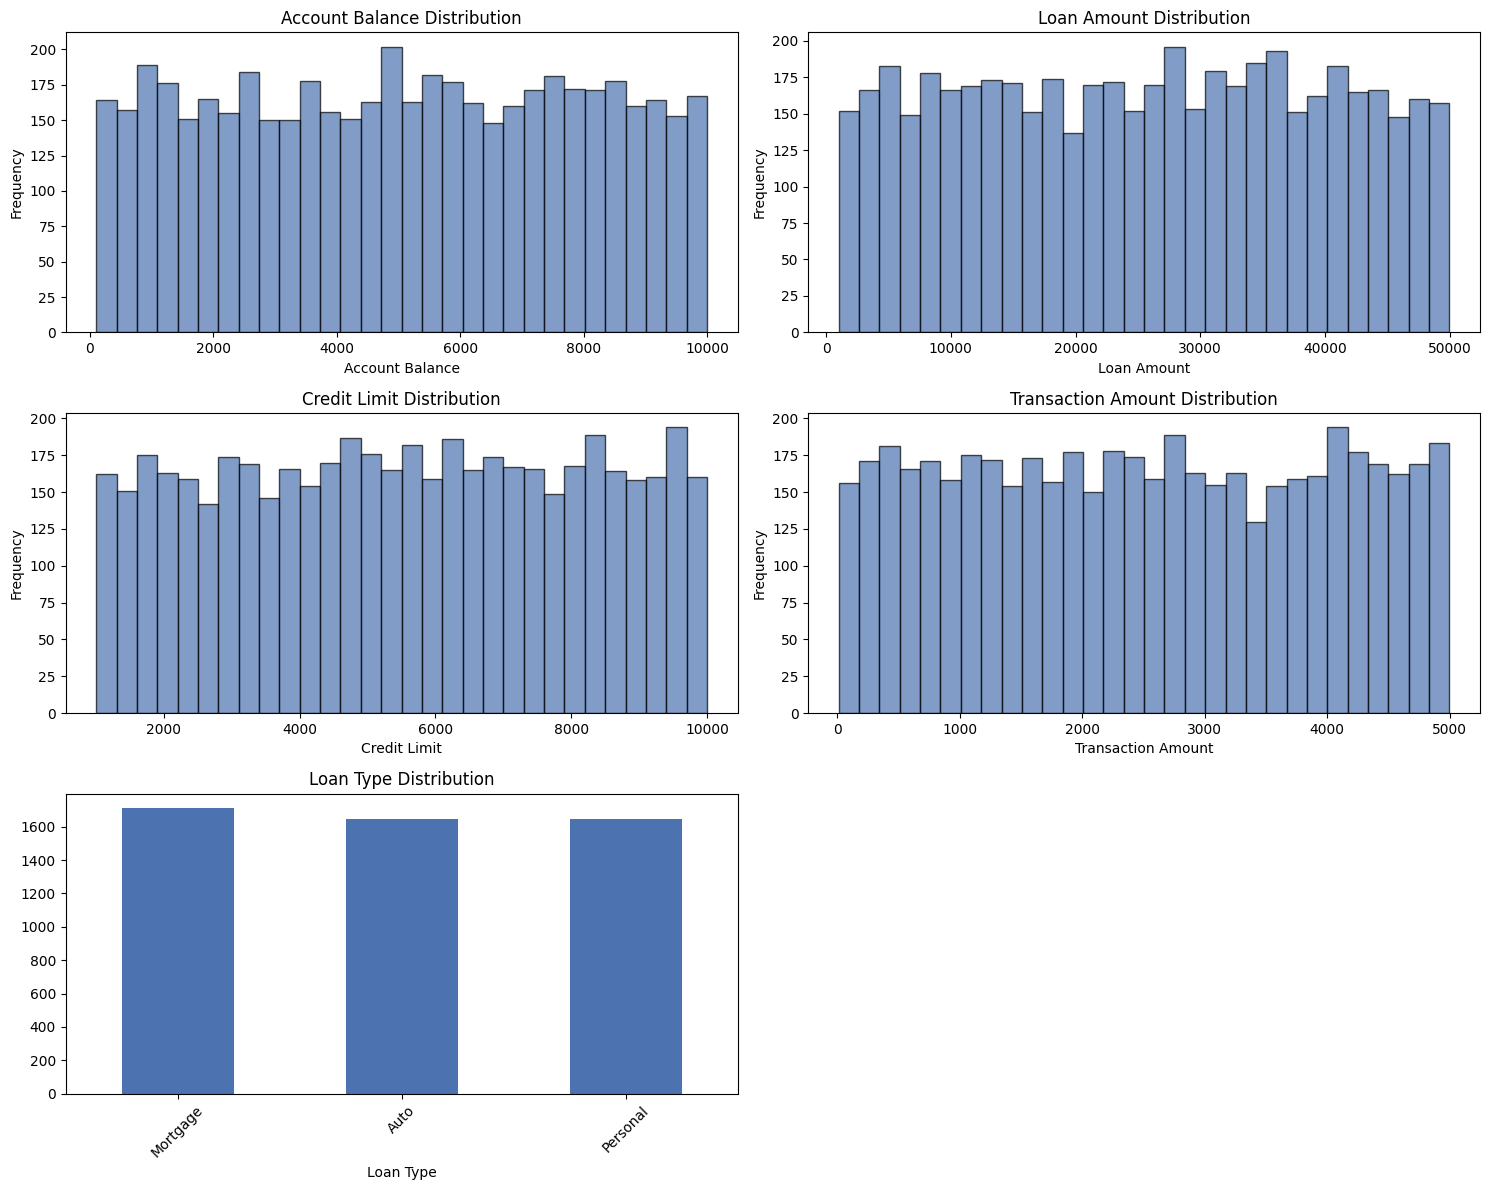

Financial Statistics:
Average Account Balance: $5060.57
Average Loan Amount: $25501.04
Average Credit Limit: $5549.04
Most Common Loan Type: Mortgage
Most Common Card Type: MasterCard

TRANSACTION ANALYSIS
Number of transaction resulting in negative balance: 604


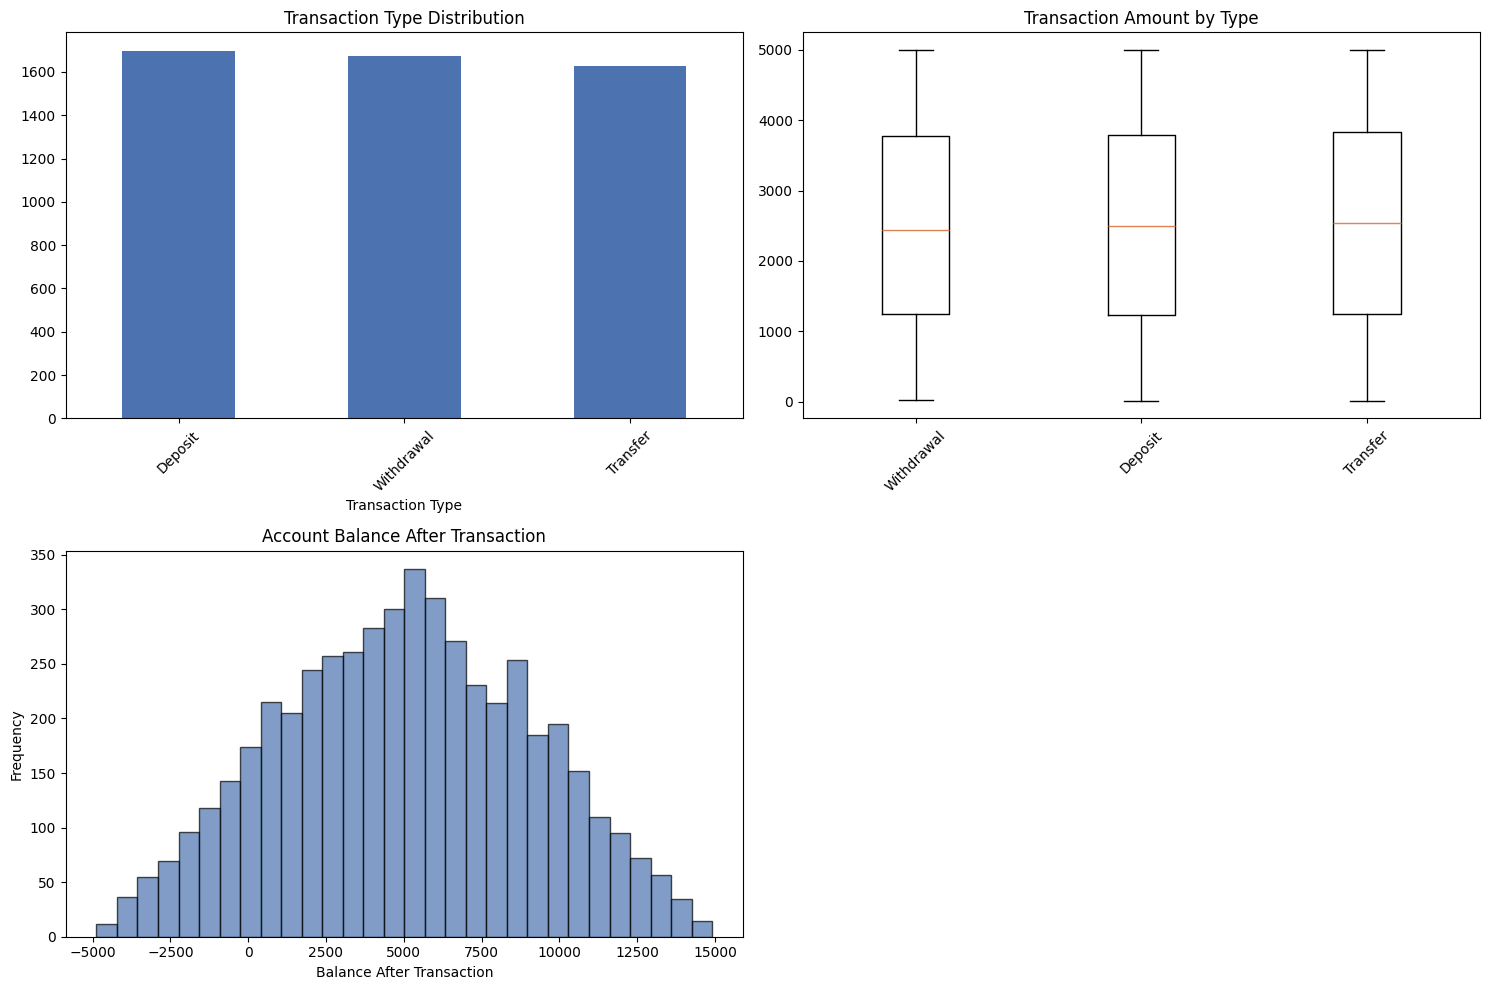


LOAN ANALYSIS


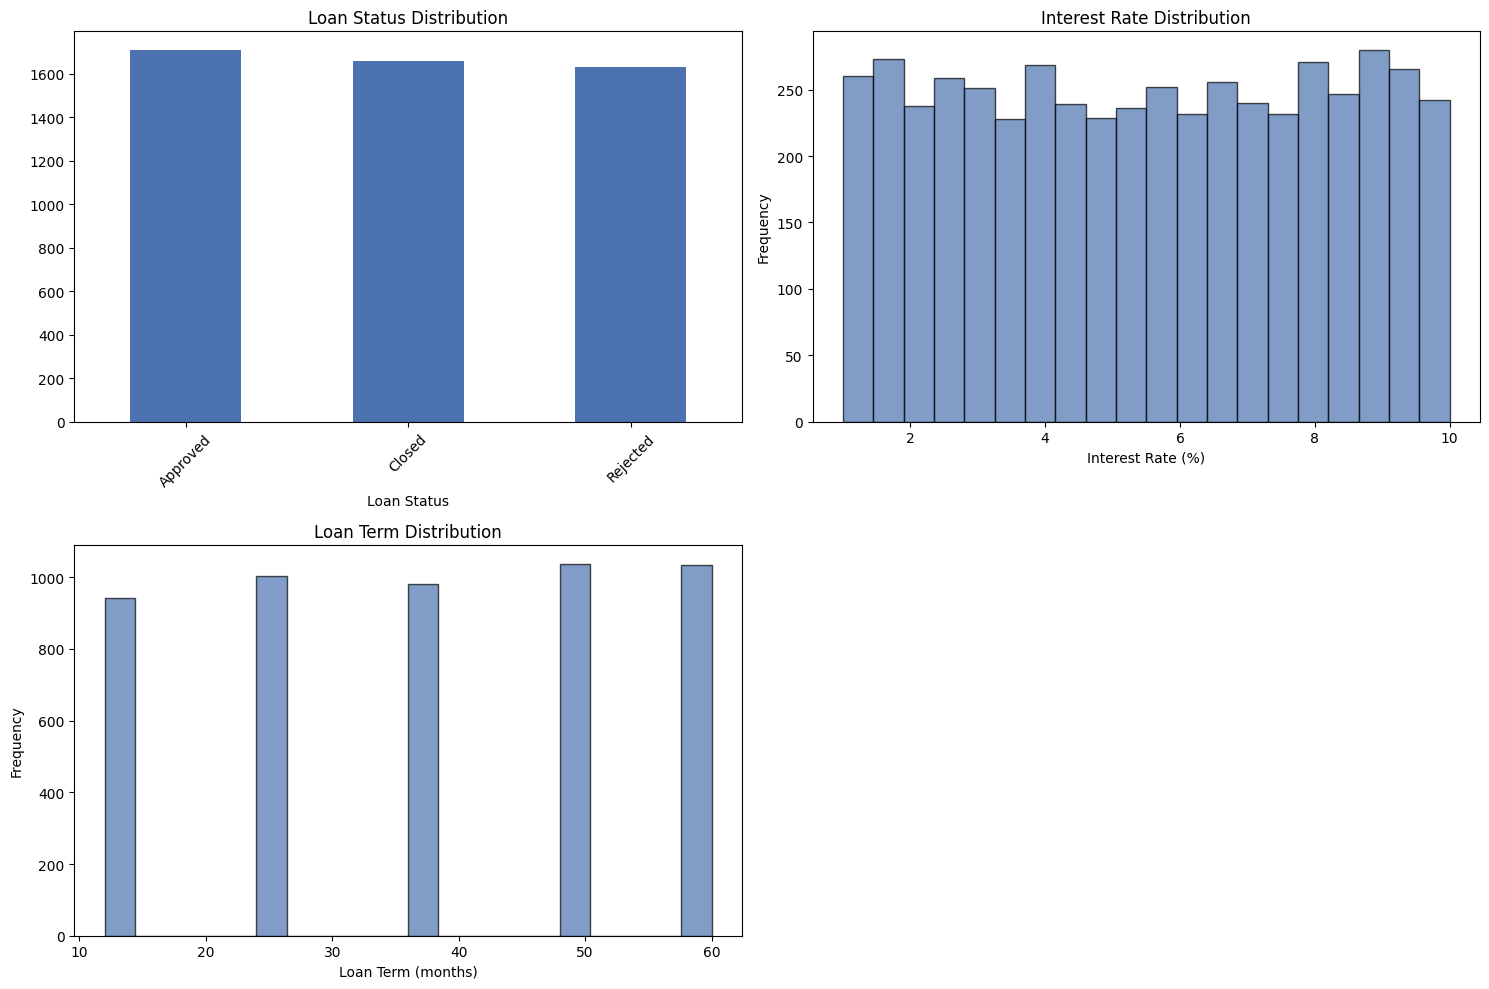

Loan Portfolio Statistics:
Average Interest Rate: 5.51%
Average Loan Term: 36.5 months
Loan Approval Rate:34.2%

CORRELATION ANALYSIS


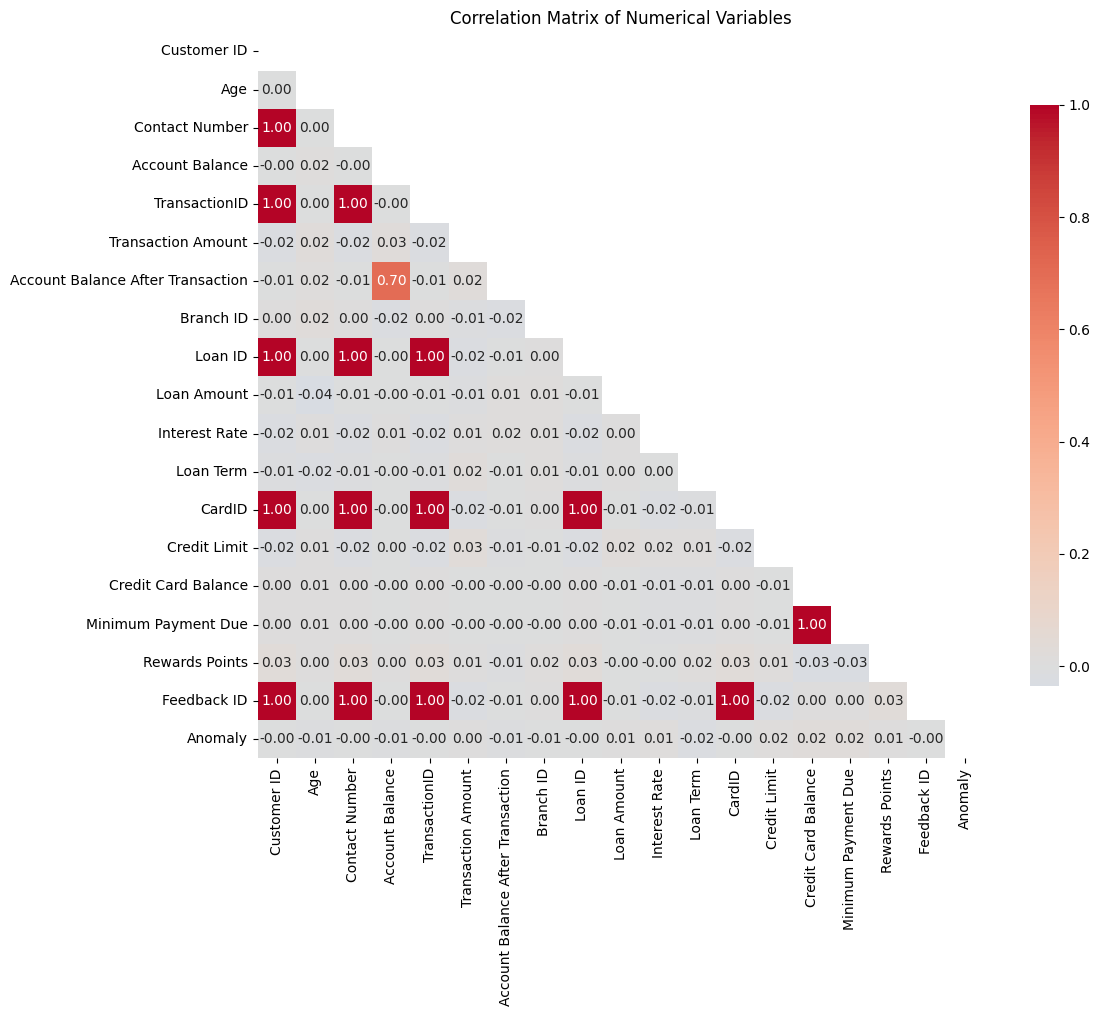

Top Correlations:
Customer ID     TransactionID     1.0
Contact Number  CardID            1.0
                Loan ID           1.0
CardID          Feedback ID       1.0
                Loan ID           1.0
                Customer ID       1.0
Contact Number  Feedback ID       1.0
Feedback ID     Customer ID       1.0
CardID          TransactionID     1.0
                Contact Number    1.0
dtype: float64

ANOMALY ANALYSIS
Anomaly Distribution:
Anomaly
 1    4700
-1     300
Name: count, dtype: int64


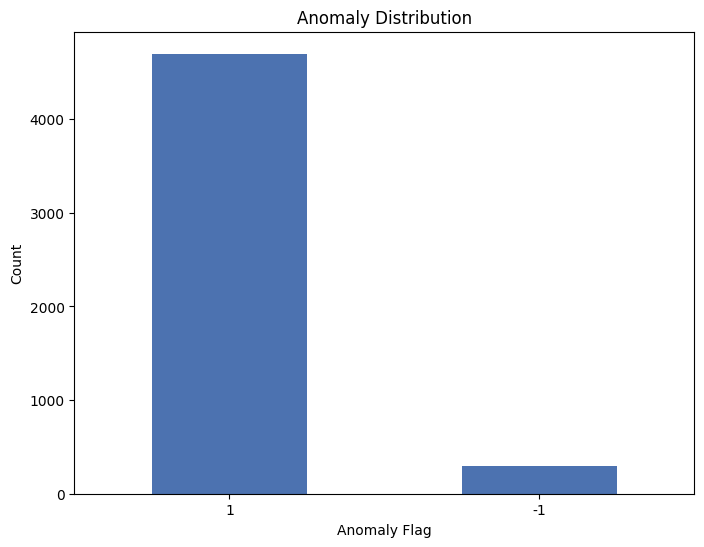


Normal records: 4700
Anomalous records: 300

Account Balance Comparison:
Normal - Mean: 5050.46, Std: 2850.12
Anomalous - Mean: 5218.96, Std: 2837.43

Transaction Amount Comparison:
Normal - Mean: 2509.79, Std: 1447.91
Anomalous - Mean: 2488.33, Std: 1487.88

Loan Amount Comparison:
Normal - Mean: 25526.42, Std: 14065.03
Anomalous - Mean: 25103.51, Std: 13654.05

Age Comparison:
Normal - Mean: 43.43, Std: 15.11
Anomalous - Mean: 44.11, Std: 15.70

EDA COMPLETED SUCCESSFULLY!


In [53]:
def comprehensive_eda(df):
    
    print("COMPREHENSIVE BANKING DATA EXPLORATORY DATA ANALYSIS")
    print("="*60)
    
    # Perform various analyses
    explore_data(df)
    basic_statistics(df)
    check_data_quality(df)
    demographic_analysis(df)
    financial_analysis(df)
    transaction_analysis(df)
    loan_analysis(df)
    correlation_analysis(df)
    anomaly_analysis(df)
    
    print("\n" + "="*50)
    print("EDA COMPLETED SUCCESSFULLY!")
    print("="*50)

    return df

df = comprehensive_eda(df)